In [1]:
import pandas as pd
import numpy as np

In [4]:
ds = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
ds.shape

(299, 13)

In [6]:
for i in ds:
    print(ds.groupby(i).size())

age
40.000     7
41.000     1
42.000     7
43.000     1
44.000     2
45.000    19
46.000     3
47.000     1
48.000     2
49.000     4
50.000    27
51.000     4
52.000     5
53.000    10
54.000     2
55.000    17
56.000     1
57.000     2
58.000    10
59.000     4
60.000    33
60.667     2
61.000     4
62.000     5
63.000     8
64.000     3
65.000    26
66.000     2
67.000     2
68.000     5
69.000     3
70.000    25
72.000     7
73.000     4
75.000    11
77.000     2
78.000     2
79.000     1
80.000     7
81.000     1
82.000     3
85.000     6
86.000     1
87.000     1
90.000     3
94.000     1
95.000     2
dtype: int64
anaemia
0    170
1    129
dtype: int64
creatinine_phosphokinase
23      1
30      1
47      3
52      1
53      1
       ..
4540    1
5209    1
5882    1
7702    1
7861    1
Length: 208, dtype: int64
diabetes
0    174
1    125
dtype: int64
ejection_fraction
14     1
15     2
17     2
20    18
25    36
30    34
35    49
38    40
40    37
45    20
50    21
55     3
60    

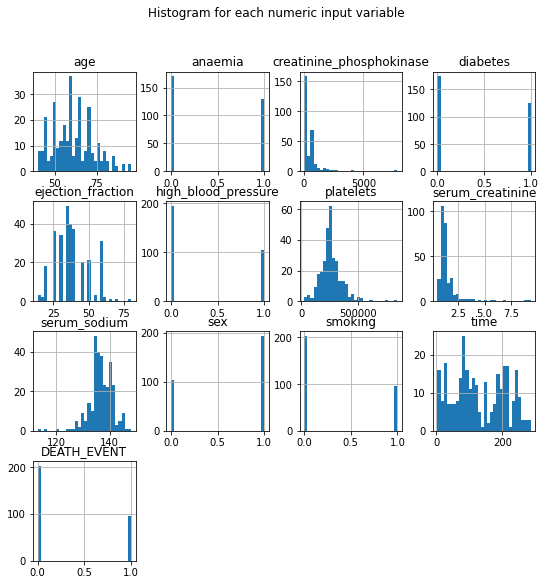

In [9]:
import matplotlib.pyplot as plt
import pylab as pl

ds.hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('deaths_hist')
plt.show()